Autor: Kevyn A. Marcelino  
Data: 2023-07-02

### Imports

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
#pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns
from scipy.optimize import minimize


import warnings
warnings.filterwarnings('ignore')

### Global Variables

In [2]:
# Lista de símbolos das ações
#tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META', 'JPM', 'V', 'JNJ', 'PG', 'INTC', 'TSLA', 'NFLX', 'NVDA', 'DIS', 'MA']
tickers = ['ITUB4.SA', 'MGLU3.SA', 'RENT3.SA', 'PETR4.SA', 'WEGE3.SA', 'ELET6.SA', 'RADL3.SA']

# Definindo as datas
start_date = '2021-01-01'
end_date = '2023-05-31'
start_date_portfolio = '2023-01-01'


In [3]:
# Obtendo os dados das ações
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.index = data.index.astype(str)

# Selecionando os dados para o período de composição das carteiras
portfolio_data = data.loc[start_date:start_date_portfolio]
portfolio_data


[*********************100%***********************]  7 of 7 completed


,ELET6.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,RADL3.SA,RENT3.SA,WEGE3.SA
Date,,,,,,,
2021-01-04,30.883385,27.947102,25.181740,11.470778,23.437645,64.908005,35.927433
2021-01-05,29.996130,27.766222,24.742058,11.919135,23.372097,64.524948,38.132572
2021-01-06,29.825502,28.580215,23.442999,11.942942,22.828997,60.809349,39.143673
2021-01-07,29.262436,29.692671,23.143217,12.300038,22.538715,63.691799,40.761410
2021-01-08,30.115568,29.683626,23.822723,12.347654,23.194185,67.991554,43.226551
...,...,...,...,...,...,...,...
2022-12-23,42.900005,24.558760,2.680000,20.983213,22.826345,55.279930,38.168095
2022-12-26,42.582867,24.071289,2.660000,20.832857,22.702082,53.768250,37.860764
2022-12-27,41.621845,23.934795,2.520000,20.974861,22.596933,51.762566,37.682316


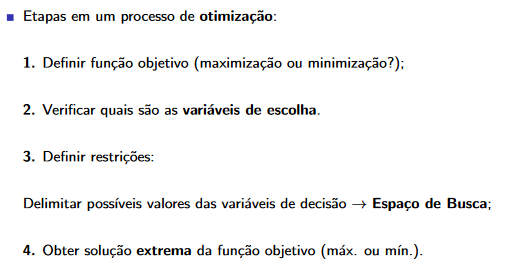

 Gradiente pode ter o problema de cair no ótimo local

### Functions

- Objetivo:
    - Maximizar o retorno esperado #Carteira de variancia minima (CVM)?
    - Minimizar o risco
    - Maximizar o retorno esperado com o menor risco possível  
  
  
- Restrições:
    - Carteiras totalmente investidas
    - Apenas Posições Long -> Depois tentar com posições short
    - Restrição para pesos


Outros

In [4]:
# 1. Função objetivo 
def objective(weights):
    # Calcula o retorno médio da carteira
    returns = np.mean(portfolio_data.pct_change())

    # Calcula a matriz de covariância dos retornos
    cov_matrix = np.cov(portfolio_data.pct_change().T)

    # Calcula o risco da carteira (desvio-padrão)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    return risk

# 2. Variáveis de Escolha


# 3. Restrições
def constraint(weights):
    return np.sum(weights) - 1


### Gradient

In [ ]:
np.ones(len(tickers))/len(tickers)

In [ ]:
# Chama o otimizador para encontrar a carteira otimizada usando o algoritmo de gradiente

# result_gradient = minimize(objective, x0=np.ones(len(tickers))/len(tickers),
#                            constraints={'type': 'eq', 'fun': constraint})


result_gradient = minimize(objective, x0=np.ones(len(tickers))/len(tickers),
                           constraints={'type': 'eq', 'fun': constraint})







### Evaluate the gradient of the function at a given point

In [ ]:
# Avaliação do desempenho da carteira no período de 2023
portfolio_eval_data = data.loc[start_date_portfolio:end_date]
portfolio_weights = result_gradient.x  # Substitua pelo resultado do algoritmo genético
portfolio_weights

In [ ]:



# Calcula o retorno médio da carteira
portfolio_returns = np.mean(portfolio_eval_data.pct_change())

# Calcula o retorno acumulado da carteira
portfolio_cumulative_returns = (1 + portfolio_eval_data.pct_change()).cumprod()

# Calcula o risco da carteira (desvio-padrão)
cov_matrix_eval = np.cov(portfolio_eval_data.pct_change().T)
portfolio_risk = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix_eval, portfolio_weights)))

# Imprime os resultados
print('Pesos da carteira otimizada:', portfolio_weights)
print('Retorno médio da carteira:', portfolio_returns)
print('Retorno acumulado da carteira:', portfolio_cumulative_returns[-1])
print('Risco da carteira:', portfolio_risk)

# teste com arquivo de ações do Leandro


{'ALPA4': 0.048663477238619586, 'ABEV3': 0.04812897618411141, 'BBRK3': 0.21915633785812583, 'BBDC4': 0.049520421068156226, 'CPFE3': 0.0558647185180535, 'EMBR3': 0.0657665136624062, 'EVEN3': 0.16704763474465192, 'MGLU3': 0.05652132339191153, 'MRVE3': 0.11870760617594654, 'ODPV3': 0.12237981619679118, 'ITUB3': 0.04824317496122611}
Retorno medio fora da amostra: 0.10%
Desvio-padrao fora da amostra: 1.54%


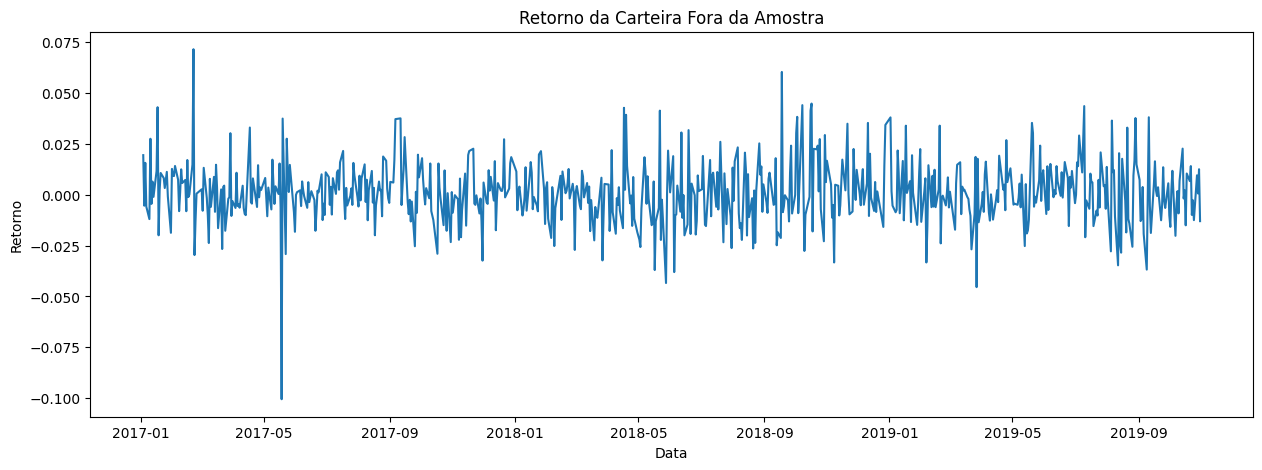

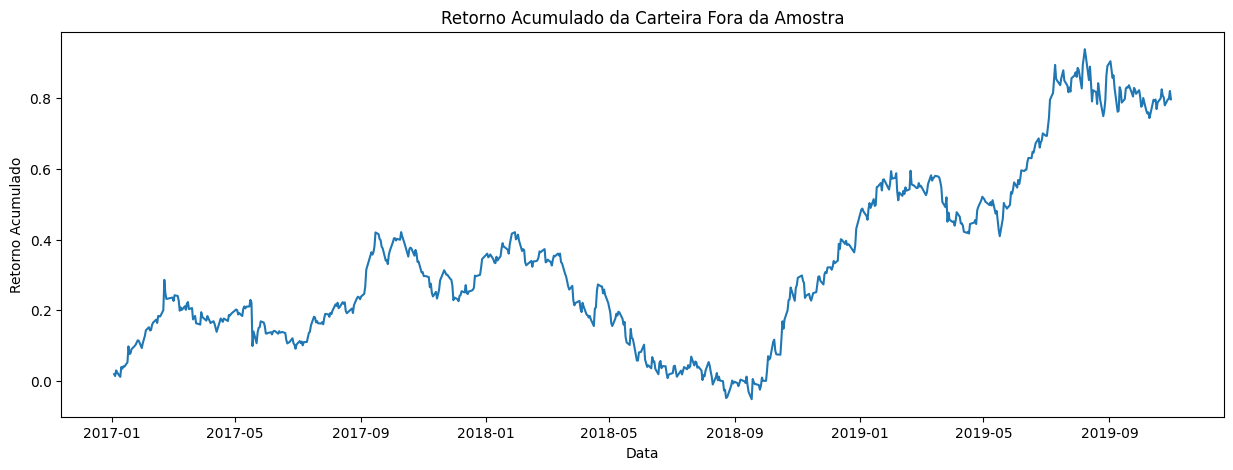

In [22]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import cvxpy as cp
from pypfopt import expected_returns, risk_models

# Carregar os dados dos retornos das acoes:

Acoes = pd.read_excel("Acoes.xlsx", sheet_name="Retornos")

# ------------------------------------------------

noAcoes = Acoes.shape[1] - 1  # numero de acoes (primeira coluna datas)

# Dividir amostra antes e depois da formacao de carteiras...

# Antes, periodo de 3/1/12 a 29/12/2016:

Retornos = Acoes.iloc[:1236, :]  # divisao com base nos dados
RetornosFora = Acoes.iloc[1237:1935, :]

# ------------------------------------------------

# Transformar dados em tipo series temporais (pacote exige):

Retornos = Retornos.iloc[:, 1:].set_index(
    pd.to_datetime(Retornos["Data"], format="%d/%m/%Y")
)
RetornosFora = RetornosFora.iloc[:, 1:].set_index(
    pd.to_datetime(RetornosFora["Data"], format="%d/%m/%Y")
)

# ------------------------------------------------

# Especificacoes da carteira:

fund_names = Retornos.columns  # nome dos ativos

# Processo de otimizacao...

# Definindo o objetivo do investidor:
returns = expected_returns.ema_historical_return(Retornos)
cov_matrix = risk_models.sample_cov(Retornos)

# Vetor de pesos das ações
weights = cp.Variable(noAcoes)

# Restricoes
constraints = [
    cp.sum(weights) == 1,  # carteira totalmente investida
    weights >= 0  # apenas posicoes compradas
    # adicione outras restricoes aqui (por exemplo, limite de peso para cada ação)
]

# Função objetivo - Carteira de variancia minima (CVM)
risk = cp.quad_form(weights, cov_matrix)
objective = cp.Minimize(risk)

# Problema de otimizacao
problem = cp.Problem(objective, constraints)

# Resolvendo o problema
problem.solve()

# Alocacoes:
allocation = dict(zip(fund_names, weights.value))
print(allocation)

# Vamos verificar o desempenho dela fora da amostra 2017 a 2019...

# Calcular os retornos nesse periodo:
portfolio_ret = (weights.value * RetornosFora).sum(axis=1)

# Retorno medio (%) fora da amostra:
mean_ret = portfolio_ret.mean() * 100
print(f"Retorno medio fora da amostra: {mean_ret:.2f}%")

# Desvio-padrao (%) fora da amostra:
std_ret = portfolio_ret.std() * 100
print(f"Desvio-padrao fora da amostra: {std_ret:.2f}%")

# Vizualizacao:
# aumentar tamanho dos gráficos
plt.rcParams["figure.figsize"] = [15, 5]

plt.plot(portfolio_ret.index, portfolio_ret)
plt.xlabel('Data')
plt.ylabel('Retorno')
plt.title('Retorno da Carteira Fora da Amostra')
plt.show()

# Visualizar retornos acumulados (soma geometrica dos retornos dia a dia):
cumulative_ret = (1 + portfolio_ret).cumprod() - 1
plt.plot(cumulative_ret.index, cumulative_ret)
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.title('Retorno Acumulado da Carteira Fora da Amostra')
plt.show()


In [28]:
allocation

{'ALPA4': 0.048663477238619586,
 'ABEV3': 0.04812897618411141,
 'BBRK3': 0.21915633785812583,
 'BBDC4': 0.049520421068156226,
 'CPFE3': 0.0558647185180535,
 'EMBR3': 0.0657665136624062,
 'EVEN3': 0.16704763474465192,
 'MGLU3': 0.05652132339191153,
 'MRVE3': 0.11870760617594654,
 'ODPV3': 0.12237981619679118,
 'ITUB3': 0.04824317496122611}

# Obtendo os setores direto da B3

- Dicionário coluna *Listagem*:

(DR1) BDR Nível 1  
(DR2) BDR Nível 2  
(DR3) BDR Nível 3  
(N1) Nível 1 de Governança Corporativa  
(N2) Nível 2 de Governança Corporativa  
(NM) Novo Mercado  
(MA) Bovespa Mais  
(M2) Bovespa Mais - Nível 2  
(MB) Balcão Organizado Tradicional  


In [85]:
import requests
import zipfile
from io import BytesIO

url_setores = 'https://www.b3.com.br/data/files/57/E6/AA/A1/68C7781064456178AC094EA8/ClassifSetorial.zip'

r = requests.get(url_setores)
z = zipfile.ZipFile(BytesIO(r.content))

# lendo arquivo xlsx dentro do zip
df = pd.read_excel(z.open(z.namelist()[0]), skiprows=5, skipfooter=15)

cols = ['setor_economico', 'subsetor', 'empresa', 'codigo', 'listagem']
# df.iloc[:2] = df.iloc[:2].fillna(method='ffill')
# df.columns = df.iloc[1]
df.columns = cols


# # Encontrar última linha com valor na coluna 'Código'
last_row = df[df['codigo'].notnull()].index[-1] + 1
df = df.iloc[2:last_row]

# Remover acentos de todas as colunas
df = df.apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8'))

# Inserindo nova coluna para extrair o segmento que está na mesma coluna da empresa
df.insert(2, 'segmento', df['empresa'])
# deixar valor do segmento se valor na coluna 'setor_economico' não for nulo, senão deixar nulo
df['segmento'] = np.where(df['codigo'].isna(), df['segmento'], np.nan)
df[['setor_economico', 'subsetor', 'segmento']] = df[['setor_economico', 'subsetor', 'segmento']].fillna(method='ffill')
df = df[(df['segmento'] != df['empresa']) & (df['setor_economico'] != 'SETOR ECONOMICO') & (df['empresa'].notna())]
df


,setor_economico,subsetor,segmento,empresa,codigo,listagem
3,"Petroleo, Gas e Biocombustiveis","Petroleo, Gas e Biocombustiveis","Exploracao, Refino e Distribuicao",3R PETROLEUM,RRRP,NM
4,"Petroleo, Gas e Biocombustiveis","Petroleo, Gas e Biocombustiveis","Exploracao, Refino e Distribuicao",COSAN,CSAN,NM
5,"Petroleo, Gas e Biocombustiveis","Petroleo, Gas e Biocombustiveis","Exploracao, Refino e Distribuicao",ENAUTA PART,ENAT,NM
6,"Petroleo, Gas e Biocombustiveis","Petroleo, Gas e Biocombustiveis","Exploracao, Refino e Distribuicao",PET MANGUINH,RPMG,NaN
7,"Petroleo, Gas e Biocombustiveis","Petroleo, Gas e Biocombustiveis","Exploracao, Refino e Distribuicao",PETROBRAS,PETR,N2
...,...,...,...,...,...,...
566,Outros,Outros,Outros,POLPAR,PPAR,NaN
567,Outros,Outros,Outros,PROMPT PART,PRPT,MB
568,Outros,Outros,Outros,SUDESTE S/A,OPSE,MB
569,Outros,Outros,Outros,SUL 116 PART,OPTS,MB


In [86]:
# Pegar a tabela com mkt cap e junta com a tabela de setores escolhendo os maiores de cada um até completar 15 no máximo

,setor_economico,subsetor,segmento,empresa,codigo,listagem
506,Financeiro,Servicos Financeiros Diversos,Gestao de Recursos e Investimentos,GP INVEST,GPIV,DR3
507,Financeiro,Servicos Financeiros Diversos,Gestao de Recursos e Investimentos,PPLA,PPLA,DR3
509,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,B3,B3SA,NM
510,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,BOA VISTA,BOAS,NM
511,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,CIELO,CIEL,NM
512,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,CLEARSALE,CLSA,NM
513,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,CSU DIGITAL,CSUD,NM
514,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,STONE CO,STOC,DR1
515,Financeiro,Servicos Financeiros Diversos,Servicos Financeiros Diversos,XP INC,XPBR,DR1
517,Financeiro,Previdencia e Seguros,Seguradoras,ALFA CONSORC,BRGE,NaN
